# Data Exploration
Get first look of data and do cleaning if necessary

In [2]:
# import libraries
import os
import json
import requests
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")

In [3]:
# import data
df = pd.read_csv('data/tracks.csv', index_col=False)
df.drop(columns={'Unnamed: 0'}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          1006 non-null   object 
 1   track_name        1006 non-null   object 
 2   artist_name       1006 non-null   object 
 3   popularity        1006 non-null   int64  
 4   genre             1006 non-null   object 
 5   danceability      1006 non-null   float64
 6   energy            1006 non-null   float64
 7   key               1006 non-null   float64
 8   loudness          1006 non-null   float64
 9   mode              1006 non-null   float64
 10  speechiness       1006 non-null   float64
 11  acousticness      1006 non-null   float64
 12  instrumentalness  1006 non-null   float64
 13  liveness          1006 non-null   float64
 14  valence           1006 non-null   float64
 15  tempo             1006 non-null   float64
 16  duration_ms       1006 non-null   float64


In [5]:
df.describe()

popularity  danceability       energy          key     loudness  \
count  1006.000000   1006.000000  1006.000000  1006.000000  1006.000000   
mean     58.822068      0.577644     0.601905     5.427435    -9.557434   
std      20.910022      0.173383     0.273462     3.530986     6.623125   
min       0.000000      0.000000     0.001590     0.000000   -45.008000   
25%      52.000000      0.468250     0.442500     2.000000   -11.026250   
50%      59.000000      0.583000     0.650000     5.000000    -7.676500   
75%      75.000000      0.703000     0.826750     9.000000    -5.399750   
max      96.000000      0.964000     0.998000    11.000000     0.832000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  1006.000000  1006.000000   1006.000000       1006.000000  1006.000000   
mean      0.606362     0.081795      0.285495          0.220686     0.173060   
std       0.488799     0.084915      0.347711          0.355551     0.135360   
min       0.000000     0.000000      0.000009          0.000000     0.028300   
25%       0.000000     0.036725      0.009993          0.000003     0.092925   
50%       1.000000     0.047600      0.104500          0.000919     0.118000   
75%       1.000000     0.082700      0.483750          0.374250     0.204000   
max       1.000000     0.591000      0.996000          0.978000     0.958000   

           valence        tempo   duration_ms  time_signature  
count  1006.000000  1006.000000  1.006000e+03     1006.000000  
mean      0.456648   118.844985  2.361563e+05        3.893638  
std       0.234672    29.481083  9.972840e+04        0.415639  
min       0.000000     0.000000  4.282700e+04        0.000000  
25%       0.258250    95.928250  1.796565e+05        4.000000  
50%       0.459000   119.962000  2.165330e+05        4.000000  
75%       0.619000   137.978250  2.707838e+05        4.000000  
max       0.969000   205.981000  1.367093e+06        5.000000

### Get Duplicates

In [6]:
df[df[['track_name', 'artist_name']].duplicated()]

track_id  \
10   3OHfY25tqY28d16oZczHc8   
227  5W3m4W9HAfdbpQxPWfrP4t   
228  4UXGrkJEfKtiS0XriOvVDg   
229  0qk3YAp2K0VFL4LqRxA4Be   
230  3UejqBR0sgEPB05PYGmP04   
231  3ZbmBVydHUpaPftVEUezth   
232  1RpQaclaUlzWTYKvt4nCLw   
233  6968at6IEPY4y8ymNErJkI   
404  2GH5jo15wbTv1Ll7zXEzSg   
405  2GH5jo15wbTv1Ll7zXEzSg   
406  2GH5jo15wbTv1Ll7zXEzSg   
420  5N6pQ2vYtd3Rb9w7LC8PZ9   
421  5N6pQ2vYtd3Rb9w7LC8PZ9   
422  5N6pQ2vYtd3Rb9w7LC8PZ9   
488  50IEXlgYlrpdm2jYQR2DBc   
567  0E0ANJRw2HvzeOq4kHlx2I   
568  2hWqkw49Kk39vchBMLUHr5   
569  7703AJATUW0d0Ast2XNaLb   
570  1yuHnBbgOF10ansTUMdnVM   
575  50n8YiO5fR586VIeUlYBB7   
577  35tvKSDoZiYJnKirM1aG4J   
619  2YC6ET3q1F29B0V7UcPV70   
628  2MuJbBWAVewREJmB8WdGJ3   
629  0m9ul5FMXzR2k2BRZKamcn   
655  3Cb75mEvjjDyZrWW4LhwPU   
656  42VKxgh4sT6FIbagHor39v   
657  4LCUyJ65570bbbPoffBycR   
658  2KY7i8waxVp40LXqt2mwvt   
659  0PcXZHHnx1aI3GfpgQaOBP   
754  5PTWlk21hqWnFu841NOp7k   
755  5PTWlk21hqWnFu841NOp7k   
756  5PTWlk21hqWnFu841NOp7k   
959  34ZAzO78a5DAVNrYIGWcPm   
971  5HQVUIKwCEXpe7JIHyY734   

                                            track_name           artist_name  \
10                                           Kill Bill                   SZA   
227                                         In the End           Linkin Park   
228                                               Lost           Linkin Park   
229                                         In the End           Linkin Park   
230                                               Lost           Linkin Park   
231                                               Lost           Linkin Park   
232                                               Lost           Linkin Park   
233                                               Lost           Linkin Park   
404                                            Fantasy    Earth, Wind & Fire   
405                                            Fantasy    Earth, Wind & Fire   
406                                            Fantasy    Earth, Wind & Fire   
420                              The Girl From Ipanema  Antônio Carlos Jobim   
421                              The Girl From Ipanema  Antônio Carlos Jobim   
422                              The Girl From Ipanema  Antônio Carlos Jobim   
488                             What A Wonderful World       Louis Armstrong   
567  Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...  Ludwig van Beethoven   
568           Bagatelle in a Minor, WoO 59 "Für Elise"  Ludwig van Beethoven   
569  Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...  Ludwig van Beethoven   
570  Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...  Ludwig van Beethoven   
575                                  Für Elise, WoO 59  Ludwig van Beethoven   
577  Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...  Ludwig van Beethoven   
619                                        Break Stuff           Limp Bizkit   
628                                  It Was A Good Day              Ice Cube   
629                                  It Was A Good Day              Ice Cube   
655                                         Lovely Day          Bill Withers   
656                                         Lovely Day          Bill Withers   
657                                         Lovely Day          Bill Withers   
658                                         Lovely Day          Bill Withers   
659                                         Lovely Day          Bill Withers   
754                                I Give You My Heart         Mr. President   
755                                I Give You My Heart         Mr. President   
756                                I Give You My Heart         Mr. President   
959                                              Shirt                   SZA   
971              Young, Wild & Free (feat. Bruno Mars)            Snoop Dogg   

     popularity      genre  danceability   energy   key  loudness  mode  \
10           92        rap         0.644  0.72800   8.0  

In [7]:
df[df[['track_name']].duplicated()]

track_id  \
10   3OHfY25tqY28d16oZczHc8   
227  5W3m4W9HAfdbpQxPWfrP4t   
228  4UXGrkJEfKtiS0XriOvVDg   
229  0qk3YAp2K0VFL4LqRxA4Be   
230  3UejqBR0sgEPB05PYGmP04   
231  3ZbmBVydHUpaPftVEUezth   
232  1RpQaclaUlzWTYKvt4nCLw   
233  6968at6IEPY4y8ymNErJkI   
404  2GH5jo15wbTv1Ll7zXEzSg   
405  2GH5jo15wbTv1Ll7zXEzSg   
406  2GH5jo15wbTv1Ll7zXEzSg   
420  5N6pQ2vYtd3Rb9w7LC8PZ9   
421  5N6pQ2vYtd3Rb9w7LC8PZ9   
422  5N6pQ2vYtd3Rb9w7LC8PZ9   
488  50IEXlgYlrpdm2jYQR2DBc   
567  0E0ANJRw2HvzeOq4kHlx2I   
568  2hWqkw49Kk39vchBMLUHr5   
569  7703AJATUW0d0Ast2XNaLb   
570  1yuHnBbgOF10ansTUMdnVM   
575  50n8YiO5fR586VIeUlYBB7   
577  35tvKSDoZiYJnKirM1aG4J   
619  2YC6ET3q1F29B0V7UcPV70   
628  2MuJbBWAVewREJmB8WdGJ3   
629  0m9ul5FMXzR2k2BRZKamcn   
655  3Cb75mEvjjDyZrWW4LhwPU   
656  42VKxgh4sT6FIbagHor39v   
657  4LCUyJ65570bbbPoffBycR   
658  2KY7i8waxVp40LXqt2mwvt   
659  0PcXZHHnx1aI3GfpgQaOBP   
721  3T6NtWjH6klzhSsAGROlqY   
754  5PTWlk21hqWnFu841NOp7k   
755  5PTWlk21hqWnFu841NOp7k   
756  5PTWlk21hqWnFu841NOp7k   
803  30zcSdwEAuoit3gUpmxmMz   
829  5KrQbdqvojQAp2wxIO1dtQ   
959  34ZAzO78a5DAVNrYIGWcPm   
971  5HQVUIKwCEXpe7JIHyY734   

                                            track_name           artist_name  \
10                                           Kill Bill                   SZA   
227                                         In the End           Linkin Park   
228                                               Lost           Linkin Park   
229                                         In the End           Linkin Park   
230                                               Lost           Linkin Park   
231                                               Lost           Linkin Park   
232                                               Lost           Linkin Park   
233                                               Lost           Linkin Park   
404                                            Fantasy    Earth, Wind & Fire   
405                                            Fantasy    Earth, Wind & Fire   
406                                            Fantasy    Earth, Wind & Fire   
420                              The Girl From Ipanema  Antônio Carlos Jobim   
421                              The Girl From Ipanema  Antônio Carlos Jobim   
422                              The Girl From Ipanema  Antônio Carlos Jobim   
488                             What A Wonderful World       Louis Armstrong   
567  Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...  Ludwig van Beethoven   
568           Bagatelle in a Minor, WoO 59 "Für Elise"  Ludwig van Beethoven   
569  Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...  Ludwig van Beethoven   
570  Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...  Ludwig van Beethoven   
575                                  Für Elise, WoO 59  Ludwig van Beethoven   
577  Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...  Ludwig van Beethoven   
619                                        Break Stuff           Limp Bizkit   
628                                  It Was A Good Day              Ice Cube   
629                                  It Was A Good Day              Ice Cube   
655                                         Lovely Day          Bill Withers   
656                                         Lovely Day          Bill Withers   
657                                         Lovely Day          Bill Withers   
658                                         Lovely Day          Bill Withers   
659                                         Lovely Day          Bill Withers   
721                                         Adrenaline                 AIROD   
754                                I Give You My Heart         Mr. President   
755                                I Give You My Heart         Mr. President   
756                                I Give You My Heart         Mr. President   
803                                         Illuminate                Avoure   
829                                     

In [8]:
df[df.duplicated()]

track_id             track_name           artist_name  \
404  2GH5jo15wbTv1Ll7zXEzSg                Fantasy    Earth, Wind & Fire   
406  2GH5jo15wbTv1Ll7zXEzSg                Fantasy    Earth, Wind & Fire   
420  5N6pQ2vYtd3Rb9w7LC8PZ9  The Girl From Ipanema  Antônio Carlos Jobim   
422  5N6pQ2vYtd3Rb9w7LC8PZ9  The Girl From Ipanema  Antônio Carlos Jobim   
754  5PTWlk21hqWnFu841NOp7k    I Give You My Heart         Mr. President   
755  5PTWlk21hqWnFu841NOp7k    I Give You My Heart         Mr. President   
756  5PTWlk21hqWnFu841NOp7k    I Give You My Heart         Mr. President   

     popularity      genre  danceability  energy  key  loudness  mode  \
404          59       jazz         0.608   0.745  4.0    -8.772   0.0   
406          59       funk         0.608   0.745  4.0    -8.772   0.0   
420          60       jazz         0.541   0.321  5.0   -14.418   1.0   
422          60  classical         0.541   0.321  5.0   -14.418   1.0   
754          55     techno         0.744   0.933  4.0    -4.875   1.0   
755          55     techno         0.744   0.933  4.0    -4.875   1.0   
756          55     techno         0.744   0.933  4.0    -4.875   1.0   

     speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
404       0.0857        0.3230          0.004280     0.135    0.614   88.941   
406       0.0857        0.3230          0.004280     0.135    0.614   88.941   
420       0.0329        0.7140          0.003450     0.101    0.549  133.531   
422       0.0329        0.7140          0.003450     0.101    0.549  133.531   
754       0.0329        0.0027          0.000315     0.114    0.911  145.977   
755       0.0329        0.0027          0.000315     0.114    0.911  145.977   
756       0.0329        0.0027          0.000315     0.114    0.911  145.977   

     duration_ms  time_signature  
404     277413.0             4.0  
406     277413.0             4.0  
420     200360.0             4.0  
422     200360.0             4.0  
754     215067.0             4.0  
755     215067.0             4.0  
756     215067.0             4.0

There appears to be multiple scenarios causing duplicates:
- Totally identical rows: Some songs are published multiple times e.g. in the original album release and best of compilation of a band. (Fantasy - Earth, Wind & Fire)
- Same song different versions: (Lost - Linkin Park) Probably original version, radio edit and remix under the same name.
- A song associated with multiple genres
- A joint song of multiple artists. Column `artist_name` respresent only one artists if it's a collab song and same track can come twice under each artist's name.

Strategy:
- Remove duplicates of `track_name` & `artist_name`.

In [9]:
print('Number of duplicate tracks:\t', len(df[df[['track_name']].duplicated()]))
df = df.drop_duplicates(['track_name', 'artist_name'], keep='first')

Number of duplicate tracks:	 37


In [10]:
print('Number of tracks by genre:')
df.groupby(by=['genre'])['genre'].count().sort_values()

Number of tracks by genre:


genre
funk           91
classical      93
metal          93
r&b            98
jazz           99
rap            99
techno         99
blues         100
electronic    100
rock          100
Name: genre, dtype: int64

In [21]:
print('Average values by genre')
genre_averages_df = df.groupby(by=['genre']).mean().sort_values(by='genre')
genre_averages_df.reset_index(drop=False, inplace=True)
genre_averages_df

Average values by genre


genre  popularity  danceability    energy       key   loudness  \
0       blues   57.780000      0.526460  0.580336  5.230000  -9.181180   
1   classical   27.978495      0.364455  0.087115  5.225806 -24.176935   
2  electronic   49.940000      0.613140  0.696890  5.770000  -7.827510   
3        funk   57.153846      0.651912  0.695440  5.912088  -7.364703   
4        jazz   53.424242      0.571737  0.368099  4.818182 -12.223152   
5       metal   68.516129      0.468108  0.825613  5.892473  -5.690634   
6         r&b   75.500000      0.645082  0.680388  5.571429  -6.514673   
7         rap   84.666667      0.709667  0.596515  5.282828  -6.937333   
8        rock   78.470000      0.540680  0.726470  5.500000  -6.838830   
9      techno   43.989899      0.678737  0.759596  5.424242  -8.151263   

       mode  speechiness  acousticness  instrumentalness  liveness   valence  \
0  0.730000     0.050453      0.328059          0.089629  0.179513  0.582130   
1  0.795699     0.044160      0.973785          0.832488  0.124282  0.301041   
2  0.410000     0.076907      0.165096          0.346584  0.167798  0.376751   
3  0.626374     0.111493      0.166557          0.054397  0.197688  0.599090   
4  0.565657     0.066648      0.663910          0.301742  0.157878  0.454830   
5  0.666667     0.062113      0.021404          0.041346  0.214351  0.405483   
6  0.520408     0.141435      0.160704          0.004238  0.186148  0.492863   
7  0.545455     0.156021      0.166171          0.007692  0.192332  0.392278   
8  0.690000     0.055730      0.129807          0.011752  0.153161  0.552990   
9  0.535354     0.062607      0.073124          0.547818  0.168164  0.377379   

        tempo    duration_ms  time_signature  
0  117.983230  219344.500000        3.960000  
1  108.256559  223786.473118        3.483871  
2  124.373990  242620.500000        3.940000  
3  118.550857  242618.967033        3.945055  
4  108.566152  211559.777778        3.858586  
5  127.104559  249983.215054        3.913978  
6  122.947786  215882.928571        3.938776  
7  119.896020  200597.979798        3.959596  
8  118.546720  237013.310000        3.990000  
9  127.226010  316391.585859        3.949495

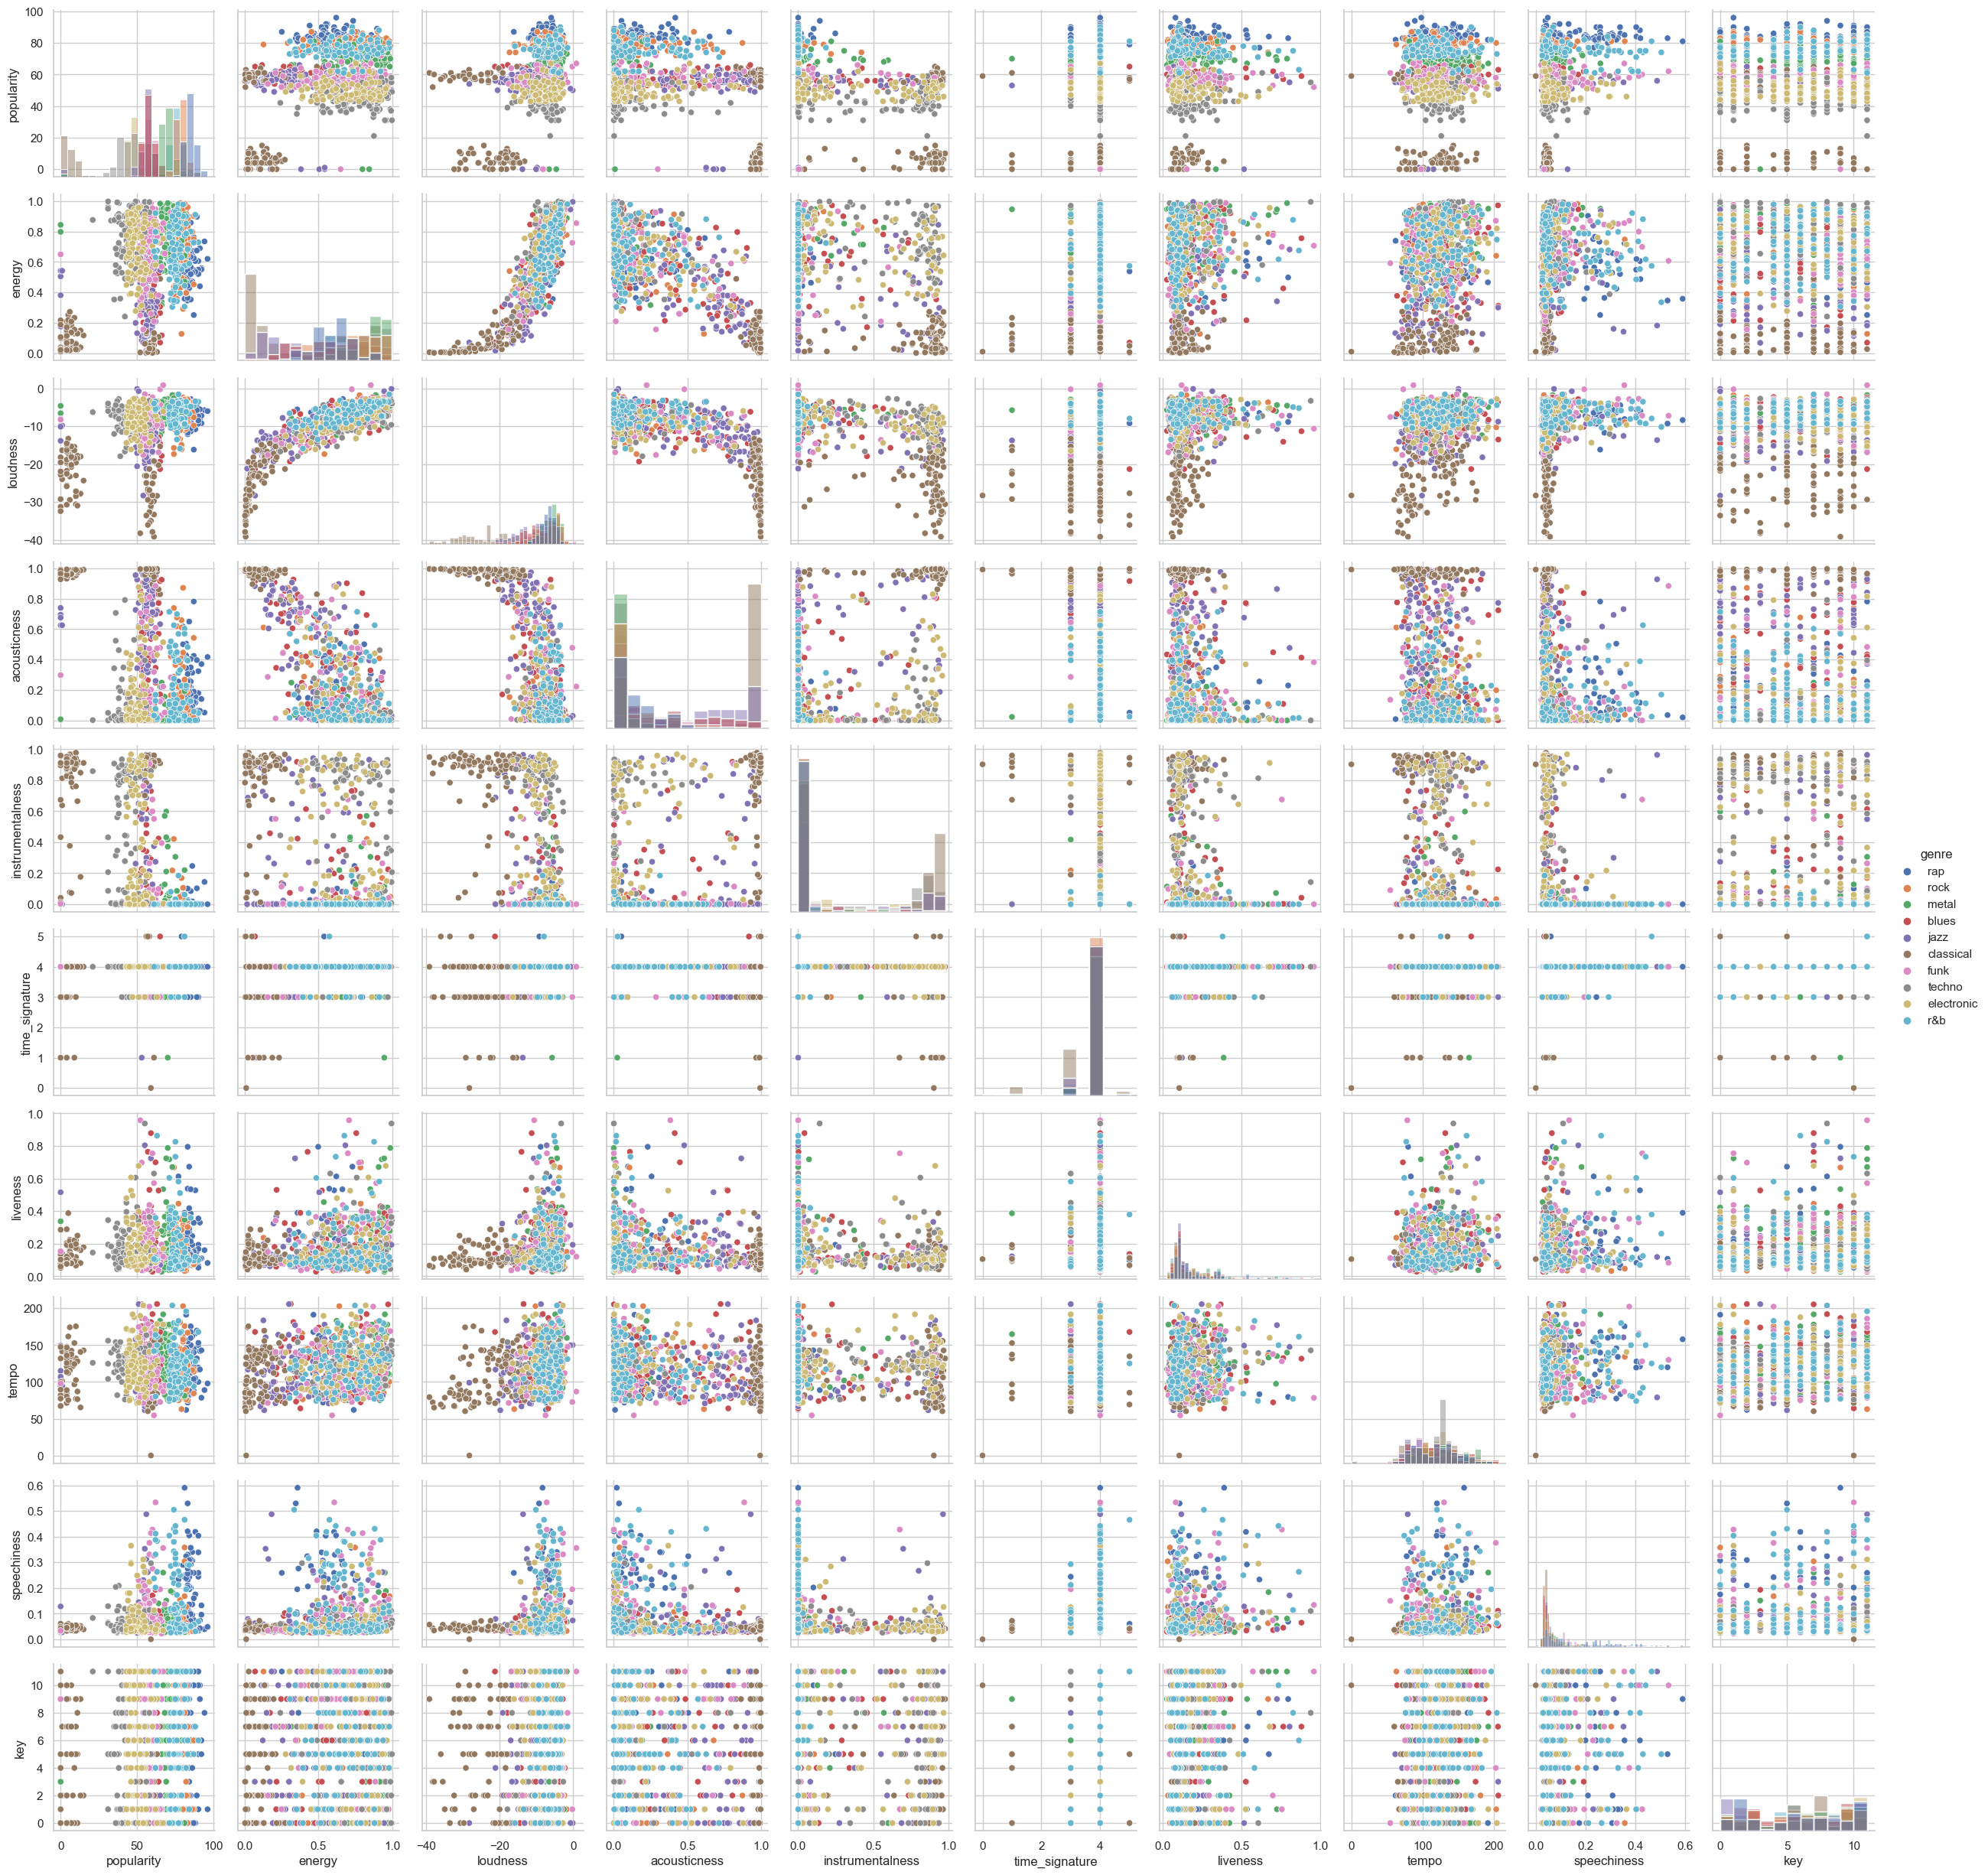

In [12]:
g = sns.PairGrid(df[['track_name', 'genre', 'popularity', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'time_signature', 'liveness', 'tempo', 'speechiness', 'key']], hue="genre")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

C:\Users\David\AppData\Local\Temp\ipykernel_23968\3743977833.py:13: RuntimeWarning: overflow encountered in exp
  corr_matrix_exp = df.applymap(lambda x: np.exp(x) if (isinstance(x, (int, float)) and x > 0) else x).corr()


<Figure size 640x480 with 0 Axes>

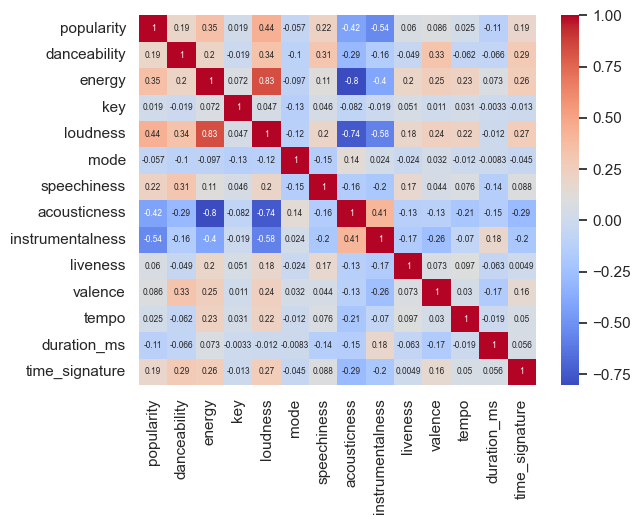

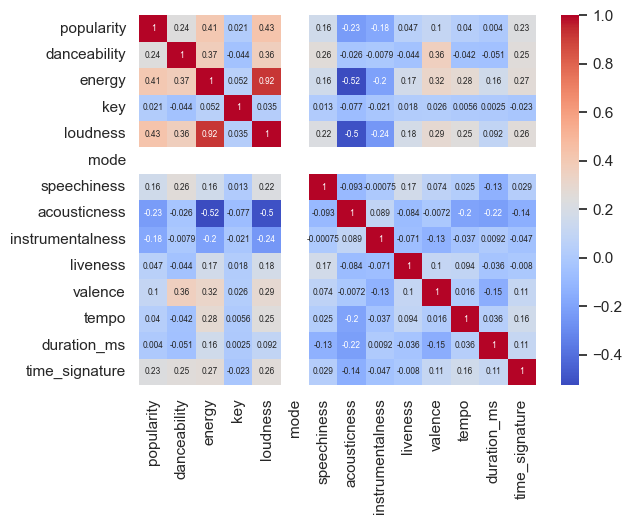

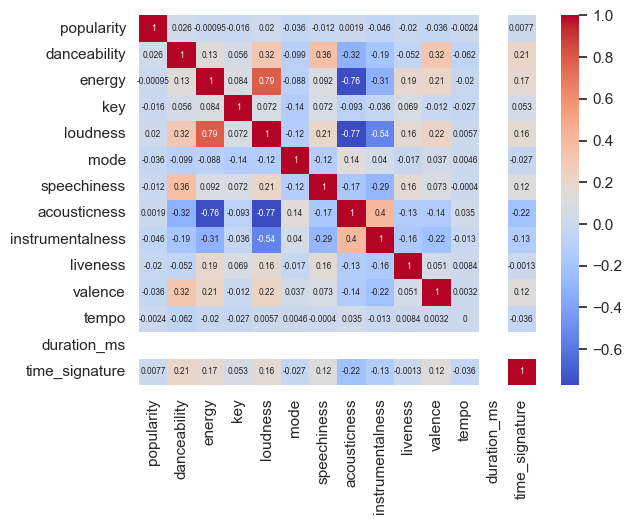

<Figure size 640x480 with 0 Axes>

In [39]:
import numpy as np
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 6})
# Plot data on a logarithmic scale
plt.figure()


corr_matrix_log = df.applymap(lambda x: np.log(x) if (isinstance(x, (int, float)) and x > 0) else x).corr()
sns.heatmap(corr_matrix_log, annot=True, cmap='coolwarm', annot_kws={'fontsize': 6})
plt.figure()

# Plot data on an exponential scale
corr_matrix_exp = df.applymap(lambda x: np.exp(x) if (isinstance(x, (int, float)) and x > 0) else x).corr()
sns.heatmap(corr_matrix_exp, annot=True, cmap='coolwarm', annot_kws={'fontsize': 6})
plt.figure()